## ELIMINACIÓN DE VARIABLES

In [1]:
import numpy as np
import pandas as pd


In [2]:
#Probabilidad de la variable dificultad
difficulty = [[0,0.6],[1,0.4]]
difficulty = pd.DataFrame(difficulty)
difficulty.columns = ['D', 'P']
print(difficulty)

   D    P
0  0  0.6
1  1  0.4


In [3]:
#Probabilidad de la variable inteligencia
intelligence = [[0,0.7],[1,0.3]]
intelligence = pd.DataFrame(intelligence)
intelligence.columns = ['I', 'P']
print(intelligence)

   I    P
0  0  0.7
1  1  0.3


In [4]:
#Probabilidad de la variable calificacion
grade = [[0,0,1,0.3], [0,0,2,0.4],[0,0,3,0.3],
         [0,1,1,0.05], [0,1,2,0.25],[0,1,3,0.7],
         [1,0,1,0.9], [1,0,2,0.08],[1,0,3,0.02],
         [1,1,1,0.5], [1,1,2,0.3],[1,1,3,0.2]]
grade = pd.DataFrame(grade)
grade.columns=['I','D','G','P']
print(grade)

    I  D  G     P
0   0  0  1  0.30
1   0  0  2  0.40
2   0  0  3  0.30
3   0  1  1  0.05
4   0  1  2  0.25
5   0  1  3  0.70
6   1  0  1  0.90
7   1  0  2  0.08
8   1  0  3  0.02
9   1  1  1  0.50
10  1  1  2  0.30
11  1  1  3  0.20


In [5]:
#Probabilidad de la variable SAT
SAT = [[0,0,0.95], [0,1,0.05], [1,0,0.2],[1,1,0.8]]
SAT = pd.DataFrame(SAT)
SAT.columns = ['I', 'S', 'P']
print(SAT)

   I  S     P
0  0  0  0.95
1  0  1  0.05
2  1  0  0.20
3  1  1  0.80


In [6]:
#Probabilidad de la variable carta
letter = [[1,0,0.1],[1,1,0.9],[2,0,0.4],[2,1,0.6], [3,0,0.99], [3,1,0.01]]
letter = pd.DataFrame(letter)
letter.columns = ['G','L','P']
print(letter)

   G  L     P
0  1  0  0.10
1  1  1  0.90
2  2  0  0.40
3  2  1  0.60
4  3  0  0.99
5  3  1  0.01


## Obteniendo Probabilidades

In [7]:
def get_Factor(factor1, factor2, param_eval, param):
    f1 = factor1[param_eval]
    f2 = factor2[param_eval]
    f1_param = factor1[param]
    p1 = factor1['P']
    p2 = factor2['P']
    new_factor = []
    
    for i in range(f1.size):
        for j in range(f2.size):
            if(f1[i] == f2[j]):
                new_factor.append([f2[j], f1_param[i],p1[i]*p2[j]])
                break
                
    new_factor = pd.DataFrame(new_factor)
    new_factor.columns = [param_eval, param, 'P']
    
    return new_factor


In [8]:
def get_marginalizacion(factor_input, param_eval):
    
    factor = factor_input.copy()   
    f = factor[param_eval]
    p = factor['P']
    new_factor_mar = []
    list_aux = np.array((np.zeros(f.size)))
    
    for i in range(f.size):
        f1 = f[i+1:].copy() 
        val_aux = p[i]
        for j in range(len(f1)):
            if(f[i] == f1[j+i+1] and list_aux[j+i+1] == 0):
                val_aux = val_aux+p[j+i+1]
                list_aux[j+i+1] = 1;
        if(list_aux[i] == 0):
            new_factor_mar.append([f[i], val_aux])
                
    new_factor_mar = pd.DataFrame(new_factor_mar)
    new_factor_mar.columns = [param_eval, 'P']
    
    return new_factor_mar
        

In [9]:
# Obteniendo nuevo factor SAT
factor_SAT = get_Factor(SAT, intelligence, 'I', 'S')
print(factor_SAT)

   I  S      P
0  0  0  0.665
1  0  1  0.035
2  1  0  0.060
3  1  1  0.240


In [10]:
# Obteniendo marginalización SAT
mar_SAT = get_marginalizacion(factor_SAT, 'S')
print(mar_SAT)

   S      P
0  0  0.725
1  1  0.275


In [11]:
def get_Factor2(factor1, factor2, factor3, param_eval1, param_eval2, param):
    f1_1 = factor1[param_eval1]    
    f1_2 = factor1[param_eval2]
    
    f2 = factor2[param_eval1]
    f3 = factor3[param_eval2]
    
    f1_param = factor1[param_eval1]
    f2_param = factor1[param_eval2]
    f3_param = factor1[param]
    
    p1 = factor1['P']
    p2 = factor2['P']
    p3 = factor3['P']
    
    new_factor = []
    
    for i in range(f1_1.size):
        for j in range(f2.size):
            for k in range(f3.size):
                 if(f1_1[i] == f2[j] and f1_2[i] == f3[k]):
                    new_factor.append([f3_param[i], f1_param[i], f2_param[i], p1[i]*p2[j]*p3[k] ])
                    break
                
    new_factor = pd.DataFrame(new_factor)
    new_factor.columns = [param, param_eval1, param_eval2, 'P']
    
               
    return new_factor

In [12]:
# Obteniendo nuevo factor grade
factor_grade = get_Factor2(grade, intelligence, difficulty, 'I', 'D', 'G')
print(factor_grade)

    G  I  D       P
0   1  0  0  0.1260
1   2  0  0  0.1680
2   3  0  0  0.1260
3   1  0  1  0.0140
4   2  0  1  0.0700
5   3  0  1  0.1960
6   1  1  0  0.1620
7   2  1  0  0.0144
8   3  1  0  0.0036
9   1  1  1  0.0600
10  2  1  1  0.0360
11  3  1  1  0.0240


In [13]:
# Obteniendo marginalización grade
mar_grade = get_marginalizacion(factor_grade, 'G')
print(mar_grade)

   G       P
0  1  0.3620
1  2  0.2884
2  3  0.3496


In [14]:
# Obteniendo nuevo factor carta
factor_letter = get_Factor(letter, mar_grade, 'G', 'L')
print(factor_letter)

   G  L         P
0  1  0  0.036200
1  1  1  0.325800
2  2  0  0.115360
3  2  1  0.173040
4  3  0  0.346104
5  3  1  0.003496


In [15]:
# Obteniendo marginalización grade
mar_letter = get_marginalizacion(factor_letter, 'L')
print(mar_letter)

   L         P
0  0  0.497664
1  1  0.502336


## Verificando con SanIam

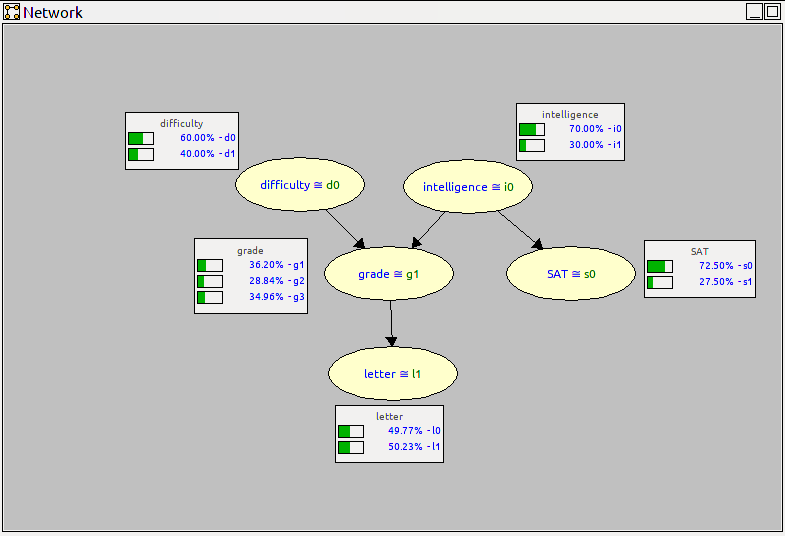

In [16]:
from IPython.display import Image
Image(filename='samiam.png')

Como se puede verificar, nuestras probabilidades coinciden con los datos de SamIam